In [2]:
import os

import zipfile as zip
import pandas as pd
import csv
import numpy as np
import requests as rq
import io
from scipy import optimize
import matplotlib.pyplot as plt
import requests, pandas as pd
from bs4 import BeautifulSoup
import urllib.request
import pip
import warnings
from cif import cif
import xml.etree.ElementTree as ET

import re
import seaborn as sns
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 1000)

C:\Users\vw191\Downloads\annaconda\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [ ]:
with open(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Datastore\oecd_full.csv') as f:
        print(f.encoding)

In [ ]:
fdf = pd.read_csv(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Datastore\oecd_full.csv', encoding=f.encoding)
fdf
fdf.columns = ['metro_id' , 'metro_name', 'var', 'variables', 'time', 'year', 'unit_code','unit','powercode_code','powercode','reference_period_code','reference_period','value','flag_codes','flags']
fdf['id_name'] = fdf['metro_id'] + fdf['metro_name']
print(fdf.columns)
print(fdf.variables.unique())
d = fdf[fdf['year'] == 2017]
list = fdf.variables.unique()
ndf = fdf[fdf['variables'] == 'GDP (Million USD, constant prices, constant PPP, base year 2015)']
for i in list:
    j = str(i).replace(' ','_')
    print(j)
    ndf[j] = fdf[fdf['variables'] == str(i)]
    mdf = ndf.join(ndf[j], on='id_name')
mdf

In [80]:
df = pd.read_excel(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Datastore\oecd.xlsx', sheet_name='OECD.Stat export',header=None,skiprows=2,nrows=1132,na_values='..')
df.columns = ['metro_area','var','unit','b','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'] #Rename all columns.
df = df.drop('unit',axis=1) #Drop unit column.
df.metro_area = df.metro_area.ffill(axis=0,limit=11) #As the file was xlsx the metropolitan names did not fill for each row. Therefore I ffill to include the correct name for all rows.
df = df.iloc[2:,:] #Dropped first two rows as they were rows before dataset.
df = df.drop('b',axis=1) #Dropped an empty column.
df['var'] = df['var'].str.replace(' ','_')
df[['id','name']] = df['metro_area'].str.split(':', 1, expand=True) #split metro_area column into the oecd id and metro name.
#Convert all numeric columns to float dtype.
for i in ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']:
    df[i] = df[i].astype('float')
for i in ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']:
    df[i + '_ln'] = np.log(df[i])
#Calculates average annual growth rates.
df['gr06-10'] = (((df['2010'] / df['2006'])**(1/5))-1)*100
df['gr11-15'] = (((df['2015'] / df['2011'])**(1/5))-1)*100
df['gr16-20'] = (((df['2020'] / df['2016'])**(1/5))-1)*100
df1 = df
df1.to_csv(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\data\oecd_metro.csv')
#https://raw.githubusercontent.com/107SBakst/107SBakst.github.io/main/data/oecd_metro.csv
df.head(4)

C:\Users\vw191\Downloads\annaconda\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,metro_area,var,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,id,name,2006_ln,2007_ln,2008_ln,2009_ln,2010_ln,2011_ln,2012_ln,2013_ln,2014_ln,2015_ln,2016_ln,2017_ln,2018_ln,2019_ln,2020_ln,gr06-10,gr11-15,gr16-20
2,AUS01: Greater Sydney,Population_density_(inhabitants_per_km2),343.0,349.0,356.0,362.0,367.0,372.0,377.0,384.0,390.0,398.0,405.0,414.0,421.0,428.0,433.0,AUS01,Greater Sydney,5.837730,5.855072,5.874931,5.891644,5.905362,5.918894,5.932245,5.950643,5.966147,5.986452,6.003887,6.025866,6.042633,6.059123,6.070738,1.361817,1.360332,1.345991
3,AUS01: Greater Sydney,"Population,_all_ages,_administrative_data",4256161.0,4325525.0,4409562.0,4492380.0,4555516.0,4608949.0,4677196.0,4757364.0,4841349.0,4930189.0,5024923.0,5136919.0,5225098.0,5310099.0,5367206.0,AUS01,Greater Sydney,15.263878,15.280044,15.299286,15.317893,15.331849,15.343510,15.358209,15.375204,15.392704,15.410888,15.429921,15.451964,15.468984,15.485121,15.495818,1.368707,1.356670,1.326670
4,AUS01: Greater Sydney,Growth/shrinking_index_of_the_total_population...,103.7,105.4,107.5,109.5,111.0,112.3,114.0,116.0,118.0,120.2,122.5,125.2,127.4,129.4,130.8,AUS01,Greater Sydney,4.641502,4.657763,4.677491,4.695925,4.709530,4.721174,4.736198,4.753590,4.770685,4.789157,4.808111,4.829912,4.847332,4.862908,4.873669,1.369859,1.368949,1.319802
5,AUS01: Greater Sydney,Population_of_the_metropolitan_area_as_a_share...,20.8,20.8,20.8,20.7,20.7,20.6,20.6,20.6,20.6,20.7,20.8,20.9,20.9,20.9,20.9,AUS01,Greater Sydney,3.034953,3.034953,3.034953,3.030134,3.030134,3.025291,3.025291,3.025291,3.025291,3.030134,3.034953,3.039749,3.039749,3.039749,3.039749,-0.096339,0.096899,0.095969


In [81]:
list = df['var'].unique()
list

array(['Population_density_(inhabitants_per_km2)',
       'Population,_all_ages,_administrative_data',
       'Growth/shrinking_index_of_the_total_population_(2001=100)',
       'Population_of_the_metropolitan_area_as_a_share_of_the_national_population',
       'GDP_(Million_USD,_constant_prices,_constant_PPP,_base_year_2015)',
       'GDP_of_the_metropolitan_area_as_a_share_of_the_national_GDP',
       'GDP_per_capita_(USD,_constant_prices,_constant_PPP,_base_year_2015)',
       'Labour_productivity_(GDP_per_worker_in_USD,_constant_prices,_constant_PPP,_base_year_2015)',
       'Share_of_households_having_a_downloading/uploading_speed_of_at_least_100/10_Mbits/s',
       'Annual_reported_homicides',
       'Share_of_population_in_the_core_area_exposed_to_a_level_of_PM2.5_above_25_µg/m3'],
      dtype=object)

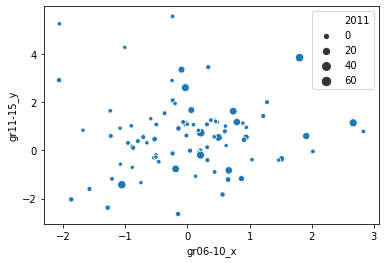

In [169]:
#print(df.columns)
dfx = df[df['var']=='Labour_productivity_(GDP_per_worker_in_USD,_constant_prices,_constant_PPP,_base_year_2015)']
dfy = df[df['var']=='GDP_per_capita_(USD,_constant_prices,_constant_PPP,_base_year_2015)']
dfs = df[df['var']=='GDP_of_the_metropolitan_area_as_a_share_of_the_national_GDP']
mdf = dfx.join(dfy.set_index(['metro_area']),lsuffix='_x',on='metro_area',rsuffix='_y')
mdf = mdf.join(dfs.set_index(['metro_area']),lsuffix='_s',on='metro_area')
mdf.head(2)
sns.scatterplot(data=mdf,x='gr06-10_x',y='gr11-15_y',size='2011')


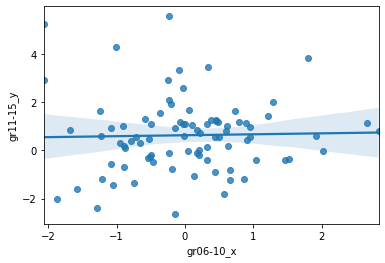

In [166]:
sns.regplot(data=mdf,x='gr06-10_x',y='gr11-15_y')

In [ ]:
#df2 = df[df['year'] == 2018]
#sns.pairplot(data=df2[['pop_density','gini','urbanised_area_per_capita','ln_pop','pop_metro_shr_cry','gdp_metro_shr_cry','gdp_per_capita','ln_prod','shr_access_fibre','homocide_rate','polycentricity']], hue='polycentricity')

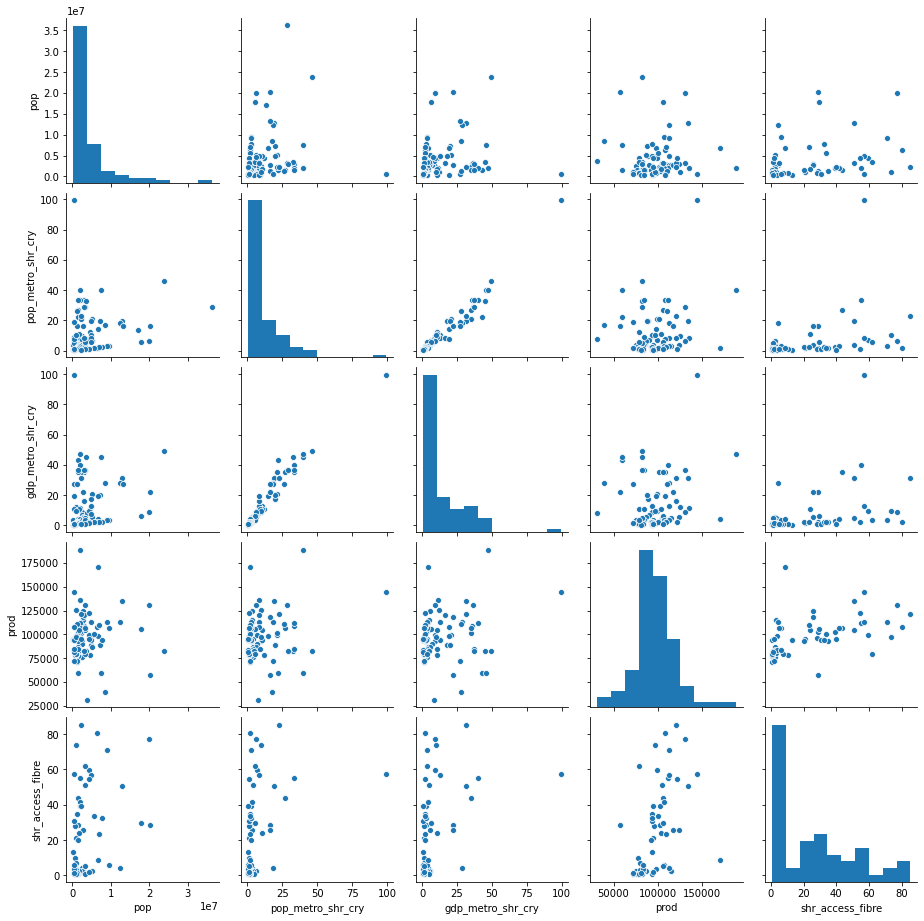

In [5]:
sns.pairplot(data=df1[['pop',	'pop_metro_shr_cry',	'gdp_metro_shr_cry',	'prod', 'shr_access_fibre']][(df1['year'] == 2018)])

Index(['metro_area', 'year', 'pop_density', 'pop_density_core',
       'pop_density_hinterland', 'urbanised_area_per_capita', 'polycentricity',
       'pop', 'pop_core', 'pop_hinterland', 'gr_index_pop',
       'pop_metro_shr_cry', 'gdp_metro_shr_cry', 'gdp_per_capita', 'prod',
       'gini', 'poverty_rate', 'shr_access_fibre', 'homocide_rate',
       'shr_pop_core_pm2.5>25', 'tree_cover_shr_core_area', 'id', 'name',
       'pop_density_ln', 'pop_density_core_ln', 'pop_density_hinterland_ln',
       'urbanised_area_per_capita_ln', 'pop_ln', 'pop_core_ln',
       'pop_hinterland_ln', 'gr_index_pop_ln', 'pop_metro_shr_cry_ln',
       'gdp_metro_shr_cry_ln', 'gdp_per_capita_ln', 'prod_ln', 'gini_ln',
       'poverty_rate_ln', 'shr_access_fibre_ln', 'homocide_rate_ln',
       'shr_pop_core_pm2.5>25_ln', 'tree_cover_shr_core_area_ln'],
      dtype='object')
2011.0
2011.0
2012.111111111111
2012.111111111111
2013.2222222222222
2013.2222222222222
2014.3333333333333
2014.3333333333333
2015.4444

,metro_area,year,id,name,prod,metro_area11,year_11,id_11,name_11,prod_11,metro_area_2011.0,year_2011.0,id_2011.0,name_2011.0,prod_2011.0,metro_area_2012.111111111111,year_2012.111111111111,id_2012.111111111111,name_2012.111111111111,prod_2012.111111111111,metro_area_2013.2222222222222,year_2013.2222222222222,id_2013.2222222222222,name_2013.2222222222222,prod_2013.2222222222222,metro_area_2014.3333333333333,year_2014.3333333333333,id_2014.3333333333333,name_2014.3333333333333,prod_2014.3333333333333,metro_area_2015.4444444444443,year_2015.4444444444443,id_2015.4444444444443,name_2015.4444444444443,prod_2015.4444444444443,metro_area_2016.5555555555557,year_2016.5555555555557,id_2016.5555555555557,name_2016.5555555555557,prod_2016.5555555555557,metro_area_2017.6666666666667,year_2017.6666666666667,id_2017.6666666666667,name_2017.6666666666667,prod_2017.6666666666667,metro_area_2018.7777777777778,year_2018.7777777777778,id_2018.7777777777778,name_2018.7777777777778,prod_2018.7777777777778,metro_area_2019.888888888889,year_2019.888888888889,id_2019.888888888889,name_2019.888888888889,prod_2019.888888888889,metro_area_2021.0,year_2021.0,id_2021.0,name_2021.0,prod_2021.0


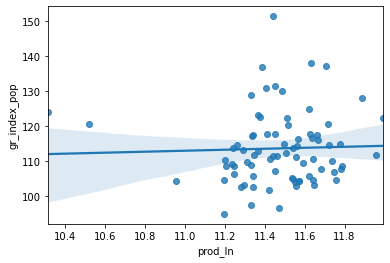

In [48]:
sns.regplot(data=df1[df1['year']==2015],x='prod_ln',y='gr_index_pop')
print(df1.columns)

dfprod = df1[['metro_area', 'year','id','name','prod']]
dfprod10 = dfprod[dfprod['year'] == 2010]
dfprod11 = dfprod[dfprod['year'] == 2011]
dfprod11.columns = ['metro_area11','year_11','id_11','name_11','prod_11']
mst = pd.merge(dfprod10,dfprod11,left_on='metro_area',right_on='metro_area11')
mst
#dfprod10.join(dfprod11,on='id',lsuffix='11')

for i in np.linspace(2011,2021,10):
    print(i)
    j = i
    print(j)
    i = dfprod[dfprod['year'] == j]
    i.columns = ['metro_area_'+str(j),'year_'+str(j),'id_'+str(j),'name_'+str(j),'prod_'+str(j)]
    mst = pd.merge(mst,i,left_on='metro_area',right_on='metro_area_'+str(j))
mst


In [ ]:
#https://ssti.org/blog/useful-stats-educational-attainment-metropolitan-area-2007-2017